In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import qeds
qeds.themes.mpl_style();

In [3]:
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
df_legend = pd.read_excel('./mpd2018.xlsx',sheet_name='Legend')
df_legend.rename(columns={'Maddison Project Database (MPD) 2018':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [5]:
df_legend

{'Full data': 'Data in  single table',
 'Partial countries': 'Data for selected sub-national units with long time series',
 'cgdppc': 'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)',
 'country': 'Country name',
 'countrycode': '3-letter ISO country code',
 'i_bm': 'For benchmark observations: 1: ICP PPP estimates, 2: Historical income benchmarks, 3: Real wages and urbanization, 4: Multiple of subsistence, 5: Braithwaite (1968) PPPs',
 'i_cig': '0/1/2: observation is extrapolated (0), benchmark (1), or interpolated (2)',
 'pop': 'Population, mid-year (thousands)',
 'rgdpnapc': 'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)',
 'year': 'Year'}

In [6]:
df = pd.read_excel('./mpd2018.xlsx',sheet_name='Full data')

In [7]:
country_list = ['GBR','USA','JPN','CHN','IND']
df2 = df[df.countrycode.isin(country_list)]

In [8]:
df2.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
2858,CHN,China,1,NaN,NaN,59600.0,NaN,NaN
2859,CHN,China,1000,NaN,NaN,59000.0,NaN,NaN
2860,CHN,China,1500,NaN,NaN,103000.0,NaN,NaN
2861,CHN,China,1600,NaN,NaN,160000.0,NaN,NaN
2862,CHN,China,1661,940.0,1083.0,NaN,Extrapolated,NaN


In [9]:
sns.set_style('whitegrid')

In [10]:
colors.remove('#fec630')

In [37]:
def plot_graphs(df2,country_list,filename,source,locs,loc_all):
    color_list = dict(zip(country_list,colors[:len(country_list)]))
    fig,ax = plt.subplots()
    sns.lineplot(x='year',y='cgdppc',hue='countrycode',linewidth=2,
                 palette=color_list,legend=False,data=df2)
    for i,country in enumerate(country_list):
        df3 = df2[df2.countrycode==country]
        label = df3.country.unique()[0]
        #loc_ = (2020,df3[df3.year==2016].cgdppc) if label != 'Japan' else (2020,df3[df3.year==2016].cgdppc-1000)
        ax.annotate(label,locs[country],color=colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita');
    #ax.legend(loc='upper left',frameon=False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.text(loc_all[0],loc_all[1],source)
    plt.savefig(filename,bbox_inches='tight')

In [111]:
year_x = 2020
year_y = 2016
locs = {country : (year_x,df2[(df2.countrycode==country)&(df2.year==year_y)].cgdppc.values[0]) for country in country_list}
locs['JPN'] = (locs['JPN'][0],locs['JPN'][1]-1000)

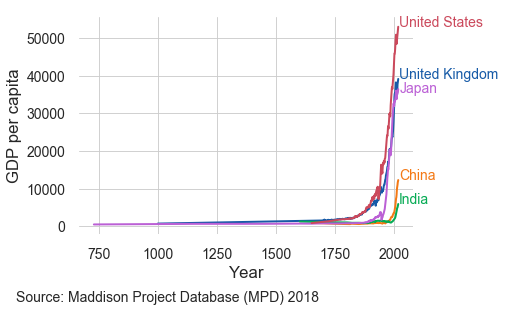

In [112]:
plot_graphs(df2,country_list,'gdp_per_capita_time.svg','Source: Maddison Project Database (MPD) 2018',locs,(400,-20000))

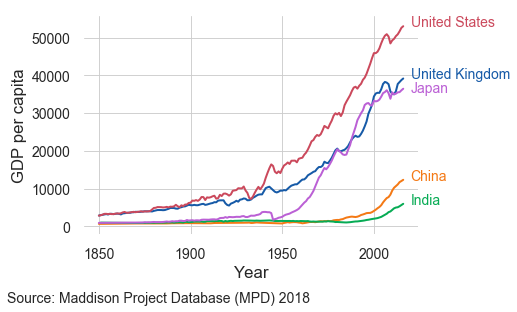

In [113]:
plot_graphs(df2[df2.year >= 1850],country_list,'gdp_per_capita_time_recent.svg','Source: Maddison Project Database (MPD) 2018',locs,(1800,-20000))

In [114]:
year_x = 2016
year_y = 2016
locs3 = {country : (year_x,df2[(df2.countrycode==country)&(df2.year==year_y)].cgdppc.values[0]) for country in country_list}
#locs3['JPN'] = (locs3['JPN'][0],locs3['JPN'][1]-1000)

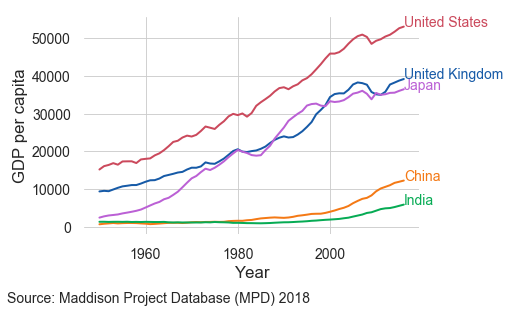

In [116]:
plot_graphs(df2[df2.year >= 1950],country_list,'gdp_per_capita_india_china_focus.svg',
            'Source: Maddison Project Database (MPD) 2018',locs3,(1930,-20000))

In [84]:
year_x = 1855
year_y = 1850
locs2 = {country : (year_x,df2[(df2.countrycode==country)&(df2.year==year_y)].cgdppc.values[0]) for country in country_list}
locs2['IND'] = (1830,df2[(df2.countrycode=='IND')&(df2.year==1841)].cgdppc.values[0]+100)
locs2['GBR'] = (1700,df2[(df2.countrycode=='GBR')&(df2.year==1700)].cgdppc.values[0]+450)
locs2['USA'] = (1740,df2[(df2.countrycode=='USA')&(df2.year==1720)].cgdppc.values[0])

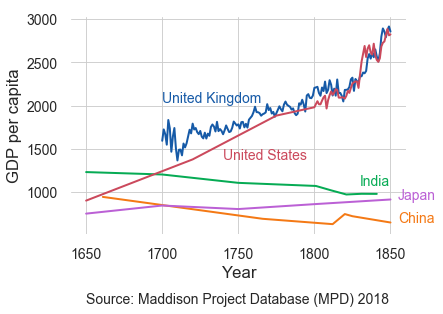

In [85]:
plot_graphs(df2[(df2.year >= 1650) & (df2.year <=1850)],
            country_list,'gdp_per_capita_1650_1850.svg',
            'Source: Maddison Project Database (MPD) 2018',locs2,(1650,-300))

In [117]:
import statsmodels.api as sm

ImportError: cannot import name 'factorial'

/Users/gunerilhan/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


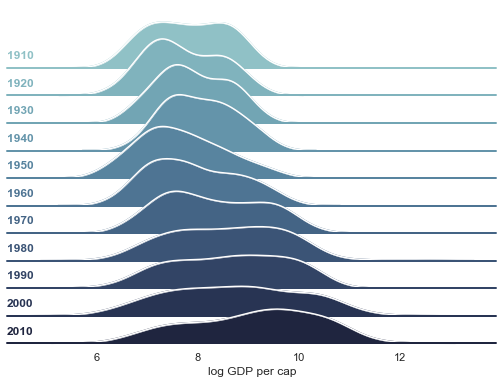

In [14]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
years_select = np.arange(1910,2020,10)
df3 = df[(df.year.isin(years_select)) & (df.cgdppc > 0)].copy()
df3['log GDP per cap'] = np.log(df3.cgdppc)
df3[df3['log GDP per cap']<=12]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(years_select.shape[0], rot=-.25, light=.7)
g = sns.FacetGrid(df3, row="year", hue="year", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'log GDP per cap', clip_on=False, shade=True, alpha=1)
g.map(sns.kdeplot, 'log GDP per cap', clip_on=False, color="w")
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'log GDP per cap')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.55)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)